# Credit Card Fraud Detection AI.

## Introducción

El fraude con tarjetas de crédito es un problema creciente que afecta tanto a las personas como a las instituciones financieras, causando pérdidas económicas significativas. Por eso, es muy importante poder detectar rápidamente cuando una transacción es sospechosa para evitar daños mayores.

En este proyecto, usamos técnicas de inteligencia artificial para crear un modelo que pueda identificar de forma automática y precisa las transacciones fraudulentas. Para lograrlo, analizamos datos históricos de compras y entrenamos diferentes modelos para encontrar el que mejor detecta el fraude.

El objetivo final es poner este modelo en funcionamiento dentro del sistema real de la empresa, ayudando a proteger a los clientes y a reducir las pérdidas económicas causadas por estas actividades fraudulentas.

### Importamos las librerías y el Dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


En este dataset de detención de fraude con tarjeta de crédito, las columnas V1 a V28 provienen de una técnica llamada Análisis de Componentes Principales (PCA). Esto significa:

Son componentes principales: combinaciones matemáticas de las variables originales (como nombre del comerciante, país, tipo de transacción, etc.), transformadas para:
* Reducir la dimensión del conjunto de datos
* Proteger la privacidad (anonimización)
* Mantener la información más importante para el análisis

### Realizamos un análisis exploratorio de datos (EDA)

In [4]:
# Mostramos la información del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No hay valores faltantes en el DataFrame y las columnas están en la categoría correcta.

In [5]:
#Buscamos valores duplicados
df.duplicated().sum()

# Eliminamos los duplicados
df = df.drop_duplicates()

# Verificamos nuevamente si hay duplicados
print("Número de duplicados después de eliminar:", df.duplicated().sum())

Número de duplicados después de eliminar: 0


In [6]:
# Checamos la correlacion entre las variables y class
print(df.corr()['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


En el análisis de correlación entre las variables del dataset y la variable objetivo Class (donde 1 indica una transacción fraudulenta), encontramos lo siguiente:
* V11 es la variable más fuertemente correlacionada positivamente con el fraude. Esto sugiere que cuando V11 toma ciertos valores, hay mayor probabilidad de que la transacción sea fraudulenta. Por tanto, es clave en la decisión del modelo.
* Por otro lado, V17 es la variable menos relacionada con fraudes, lo que indica que su valor tiene muy poca (o nula) influencia al predecir si una transacción es fraudulenta.

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribución de Clases')

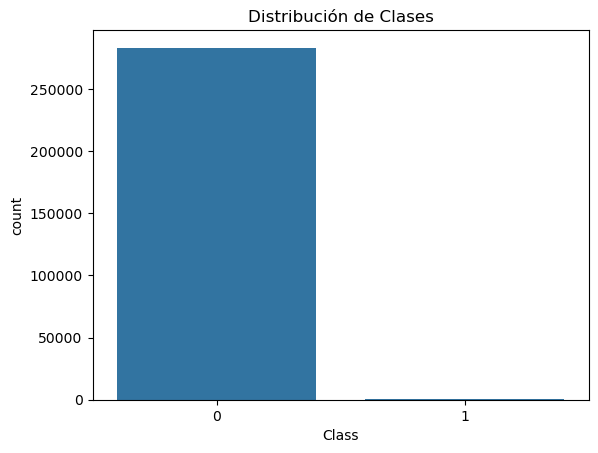

In [7]:
# Verificamos cómo están distribuidas las clases
print(df['Class'].value_counts(normalize=True))

# Graficamos la distribución de las clases
sns.countplot(x='Class', data=df)
plt.title('Distribución de Clases')

En la variable 'Class' hay un claro desbalanceo de clases, es decir, la gran mayoría de las transacciones no son fraude, y esto puede afectar al desempeño del modelo. En este caso aplicaremos un Oversampling para duplicar fraudes usando SMOTE.

In [10]:
# Separamos las características y la variable objetivo
X = df.drop('Class', axis=1)
y = df['Class']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345, stratify=y)

print("Distribución de clases en el conjunto de entrenamiento:", Counter(y_train))

# Aplicamos SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=12345)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Distribución de clases después de SMOTE:", Counter(y_train_res))

Distribución de clases en el conjunto de entrenamiento: Counter({0: 212439, 1: 355})


c:\Users\lalox\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Distribución de clases después de SMOTE: Counter({0: 212439, 1: 212439})


Ahora que el conjunto de entrenamiento ha sido balanceado usando SMOTE, contamos con la misma cantidad de ejemplos para las clases de transacciones fraudulentas y no fraudulentas.

A continuación, evaluaremos diferentes modelos de machine learning para identificar cuál ofrece el mejor desempeño en la detección de fraudes.

In [11]:
# Utilizamos una función para evaluar el modelo

import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    fig.suptitle(f"Model Evaluation: {model.__class__.__name__}", fontsize=16)
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        color = 'blue' if type == 'train' else 'green'

        # F1 vs Threshold
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color,
                label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Threshold')
        ax.set_ylabel('F1 Score')
        ax.legend(loc='lower center')
        ax.set_title('F1 Score vs Threshold')

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, AUC={roc_auc:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower center')
        ax.set_title('ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx],
                    color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend(loc='lower center')
        ax.set_title('Precision-Recall Curve')

        # Métricas simples
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return df_eval_stats


### LGRE_model

c:\Users\lalox\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


          train  test
Accuracy   0.98  0.99
F1         0.98  0.22
APS        1.00  0.76
ROC AUC    1.00  0.97


,train,test
Accuracy,0.98,0.99
F1,0.98,0.22
APS,1.00,0.76
ROC AUC,1.00,0.97


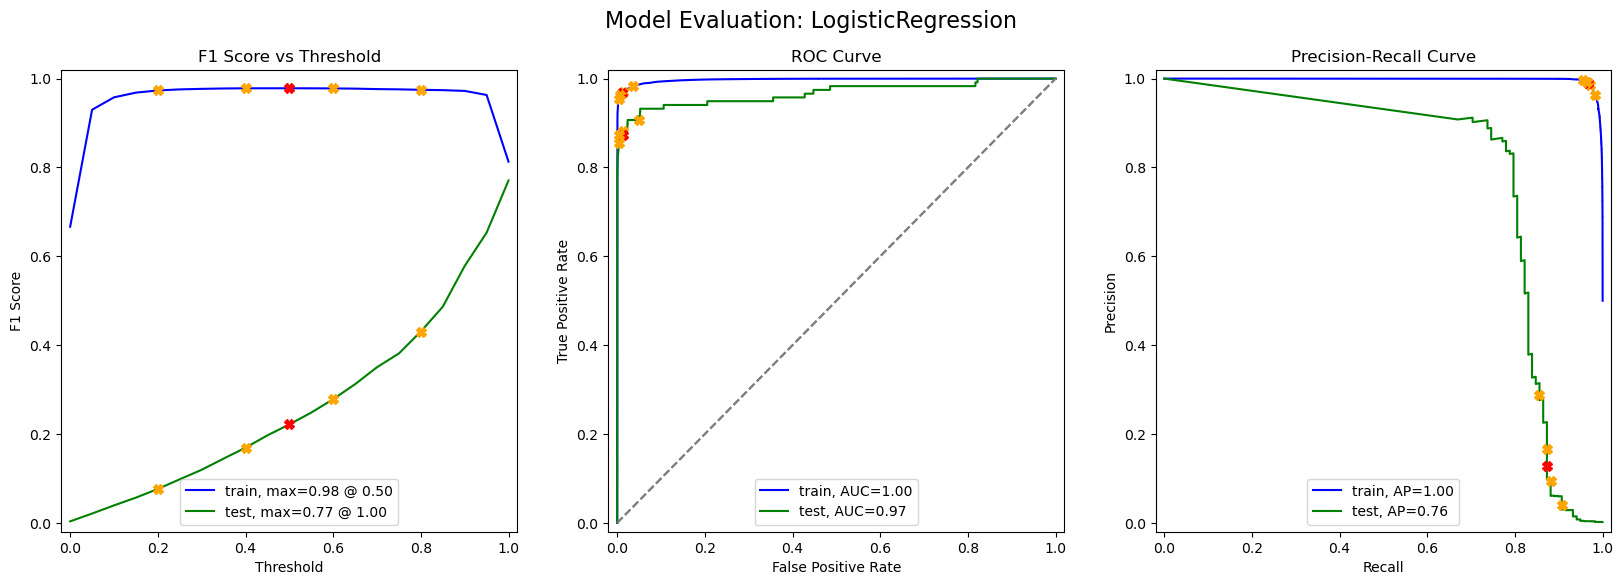

In [14]:
# Creamos un modelo de logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=12345)
model.fit(X_train_res, y_train_res)

# Evaluamos el modelo
evaluate_model(model, X_train_res, y_train_res, X_test, y_test)

### RF_model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definimos los valores a probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Modelo base
rf = RandomForestClassifier(random_state=12345, n_jobs=-1)

# Búsqueda de los mejores parámetros
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Entrenamos
grid_search.fit(X_train_res, y_train_res)

# Mejor modelo
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


          train  test
Accuracy    1.0  1.00
F1          1.0  0.82
APS         1.0  0.83
ROC AUC     1.0  0.97


,train,test
Accuracy,1.0,1.00
F1,1.0,0.82
APS,1.0,0.83
ROC AUC,1.0,0.97


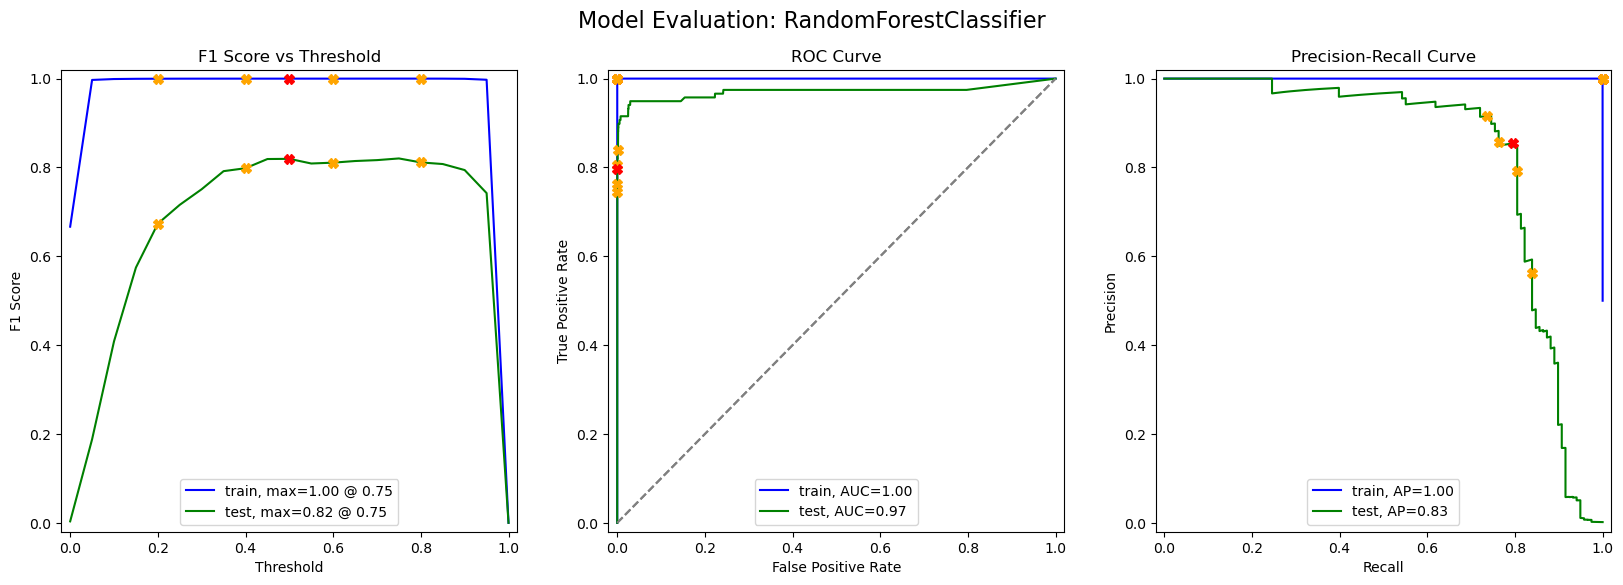

In [19]:
# Entrenamos un modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=12345, max_depth=20, max_features='sqrt', min_samples_leaf=2, n_estimators=100, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)

# Evaluamos el modelo de Random Forest
evaluate_model(rf_model, X_train_res, y_train_res, X_test, y_test)

### XGB_model

c:\Users\lalox\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


          train  test
Accuracy    1.0  1.00
F1          1.0  0.83
APS         1.0  0.84
ROC AUC     1.0  0.99


,train,test
Accuracy,1.0,1.00
F1,1.0,0.83
APS,1.0,0.84
ROC AUC,1.0,0.99


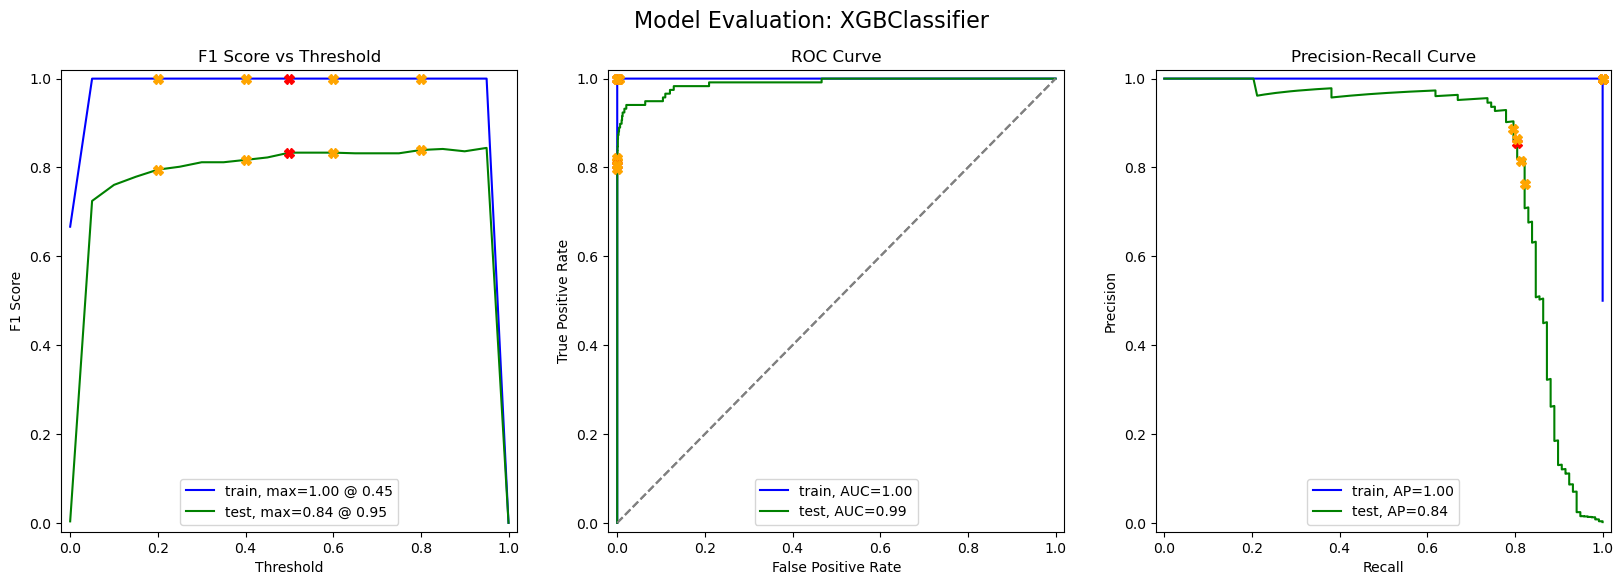

In [26]:
# Entrenamos el modelo XGBoost
xgb_model = XGBClassifier(random_state=12345, n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7, min_child_weight=1, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgb_model.fit(X_train_res, y_train_res)

# Evaluamos el modelo XGBoost
evaluate_model(xgb_model, X_train_res, y_train_res, X_test, y_test)

De los tres modelos entrenados — regresión logística, Random Forest y XGBoost — el que mostró un mejor desempeño tanto en el conjunto de entrenamiento como en el de prueba fue XGBoost. Este modelo alcanzó un valor F1 de 0.84 en el conjunto de prueba, lo que indica un buen equilibrio entre precisión y recall para la detección de fraudes. Además, obtuvo un valor de AUC-ROC de 0.99, lo que demuestra una excelente capacidad para discriminar entre transacciones fraudulentas y legítimas.

In [28]:
# Guardamos el modelo de XGBoost
import joblib
joblib.dump(xgb_model, 'xgb_model_credit_card_fraud.pkl')

['xgb_model_credit_card_fraud.pkl']

## Conclusiones

En este proyecto se desarrolló un modelo de detección de fraude en transacciones con tarjetas de crédito, utilizando técnicas de balanceo de datos y diferentes algoritmos de clasificación. Tras probar modelos como Regresión Logística, Random Forest y XGBoost, se determinó que el modelo basado en XGBoost presentó el mejor desempeño, con un valor F1 de 0.84 y un AUC-ROC de 0.99 en el conjunto de prueba.

Estos resultados indican que el modelo es capaz de identificar de manera efectiva transacciones fraudulentas, minimizando tanto falsos positivos como falsos negativos, lo cual es crucial para una aplicación en el mundo real.

La siguiente etapa consiste en desplegar este modelo en producción para integrarlo en el sistema de monitoreo de transacciones en tiempo real. Esto permitirá detectar y bloquear rápidamente transacciones sospechosas, reduciendo pérdidas y mejorando la seguridad para los usuarios y la institución financiera.